In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
N = 1000
dur = 3000
S = np.zeros(dur)
I = np.zeros(dur)
S[0] = 999
I[0] = 1
dt = 1
beta = 0.005


In [3]:
for n in range(dur - 1):
  S[n+1]=S[n] - dt * beta * S[n] * I[n] / N
  I[n+1]=I[n] + dt * beta * S[n] * I[n] / N

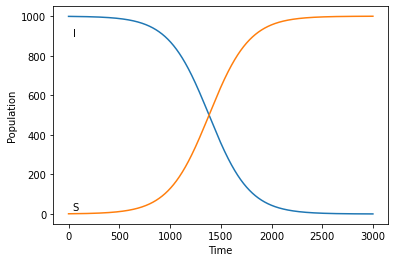

In [4]:
plt.plot(S, label='S(n)')
plt.plot(I, label='I(n)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.text(40,900,"I")
plt.text(40,20,"S")
plt.show()

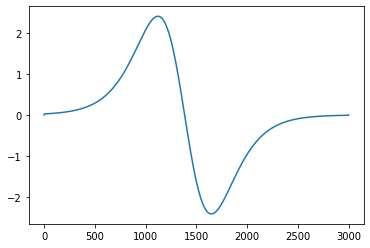

First Derivative Maximum: 2.402146710987097
I[n] / N ≈ 0.2117278361385316


In [5]:
pn = np.zeros(dur)
dpn = np.zeros(dur)
for j in range(1, dur - 1):
  pn[j-1] = beta * S[j-1] * I[j-1]
  pn[j+1] = beta * S[j+1] * I[j+1]
  dpn[j] = (pn[j+1] - pn[j-1]) / (2 * dt)

plt.plot(dpn)
plt.show()

max_value = np.amax(dpn)
print("First Derivative Maximum:", max_value)

time = np.argmax(dpn)
check = I[time] / N
print("I[n] / N ≈" ,check) 

In [8]:
# SIR Model Parameters
N = 75000
dur = 350
S = np.zeros(dur)
I = np.zeros(dur)
R = np.zeros(dur)
I[0] = 0.5
S[0] = 75000 - I[0]
R[0] = 0
dt = 1/7
beta = 8 * (10 ** -5) * N
gamma = 5.6

In [9]:
for n in range(dur - 1):
  S[n+1]= S[n] - dt * beta * S[n] * I[n] / N
  I[n+1]= I[n] + dt * (beta * S[n] * I[n] / N - gamma * I[n])
  R[n+1] = R[n] + dt * gamma * I[n]

In [10]:
plague_data = pd.read_csv("/content/bombay_plague.csv")

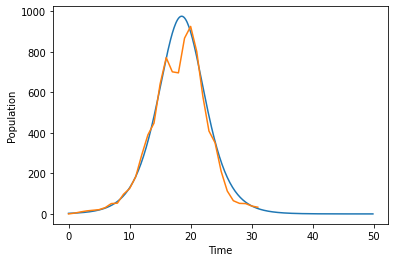

In [17]:
temp = np.arange(0, 50, 1/7)
plt.plot(temp,gamma * I)
plt.plot(plague_data['NewDeaths'])
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()